In [236]:
import numpy as np
import pandas as pd

In [237]:
# 数据处理
# np.random.seed(8)
admissions = pd.read_csv('admissions.csv')
admissions['actual_label'] = admissions['admit']
admissions = admissions.drop('admit',axis=1)

In [245]:
# 数据洗牌 打乱顺序
shuffled_index = np.random.permutation(admissions.index)
shuffled_admissions = admissions.loc[shuffled_index]

# 从中取一部分当训练(前515个) ，剩余的数据当测试（516以后）
train = shuffled_admissions.iloc[0:515]
test = shuffled_admissions.iloc[515:len(shuffled_admissions)]

print train['actual_label'].value_counts()
print test['actual_label'].value_counts()
# print shuffled_index
# print train.shape
# print test.shape
# print shuffled_admissions.shape
# print train.head(100)

0    321
1    194
Name: actual_label, dtype: int64
0    79
1    50
Name: actual_label, dtype: int64


In [226]:
# 建立模型 应用训练数据训练模型，再用测试数据测试accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [227]:
model = LogisticRegression()
model.fit(train[['gpa']],train['actual_label'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [228]:
# 准确性验证
labels = model.predict(test[['gpa']])
test['predict_label'] = labels

matches = test['predict_label'] == test['actual_label']
correct_pred = test[matches]
accuracy = len(correct_pred) / float(len(test))
print accuracy

print train.head()




0.604651162791
          gpa         gre  actual_label
87   2.929348  749.633740             1
162  3.049572  738.680683             1
385  4.000000  677.899597             1
54   3.583556  657.689211             1
153  2.909667  604.484680             0


C:\Software\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [229]:
labels1 = model.predict(train[['gpa']])
train['predict_label'] = labels1
matches1 = train['predict_label'] == train['actual_label']
correct_pred1 = train[matches1]
accuracy1 = len(correct_pred1) / float(len(train))
print accuracy1

0.658252427184


C:\Software\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ROC曲线:模型预测的综合效果

In [230]:
from sklearn import metrics
import matplotlib.pyplot as plt

[1.53352562 0.53352562 0.51149201 0.5075949  0.47058048 0.46926432
 0.45874953 0.45848774 0.45349191 0.45270748 0.45115946 0.44735428
 0.44547047 0.4370704  0.43582099 0.43155283 0.42806554 0.42458633
 0.4196501  0.41844331 0.4168551  0.40783608 0.40628458 0.40585441
 0.40309364 0.39427059 0.39299491 0.39271477 0.3923008  0.38240801
 0.38048825 0.3671616  0.3664621  0.36521216 0.36310016 0.3606078
 0.35152374 0.34868997 0.34848862 0.34279378 0.34242128 0.34201144
 0.34150205 0.34054247 0.33740495 0.33246252 0.33167249 0.3306534
 0.33053603 0.32685907 0.32682716 0.32125949 0.31993644 0.31131483
 0.30935155 0.3076386  0.30659593 0.29530877 0.28834848 0.22465419]


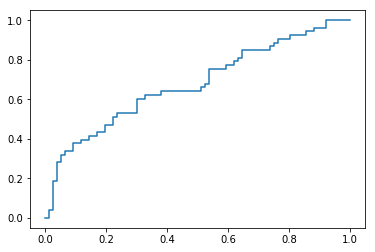

In [234]:
probabilities = model.predict_proba(test[['gpa']])

# 参数1：每数据的实际类别（如正例或负便）  参数2：每条数据模型预测值的【概率值】
# 返回值  fpr: False Positive Rate
#        tpr: True Positive Rate
#  threshold: 阈值  ，每个fpr,tpr 对应不同的阈值
# 我们希望这个模型预测正例的准确率高，预测负例的准确率也高，曲线的积分（面积）就能表示模型的好坏

fpr,tpr,thresholds = metrics.roc_curve(test['actual_label'],probabilities[:,1])
print thresholds
plt.plot(fpr,tpr)
plt.show()

roc_score

In [235]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(test['actual_label'],probabilities[:,1])
print auc_score

0.6757696127110229
